# Interactive MeteoHist graphs

Some examples how to use the class MeteoHistInteractive to plot historical weather data without using the web interface.

### Import necessary libraries and the class

In [1]:
import os
import sys

import pandas as pd

In [2]:
# Add the parent directory to the path to make imports work
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# import meteo_hist.base, meteo_hist.interactive
from meteo_hist.interactive import MeteoHistInteractive

### Create an interactive graph

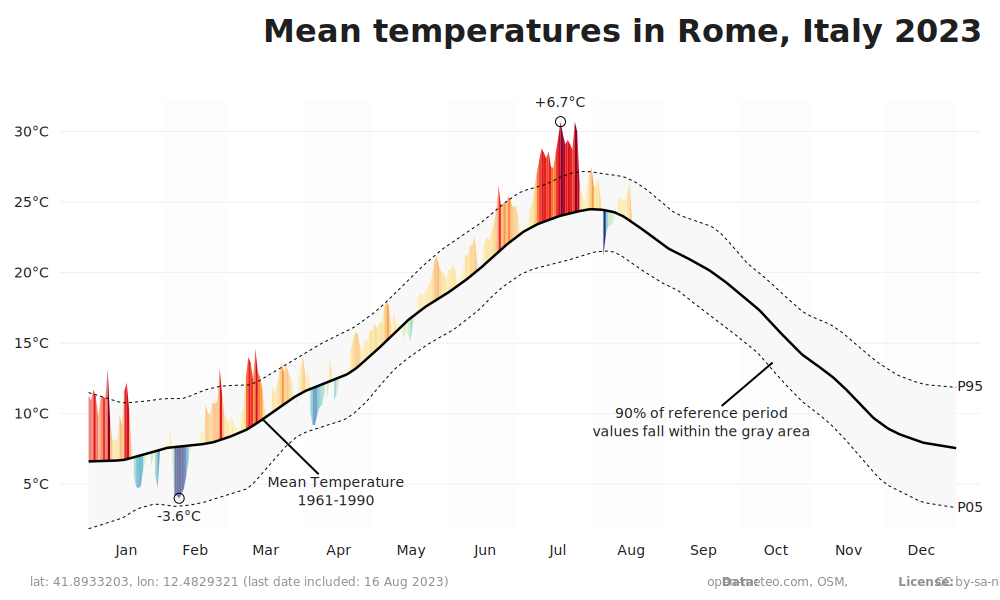

In [3]:
query = "Rome, Italy"

# Get coordinates and location name from query
result = MeteoHistInteractive.get_lat_lon(query)
coords = (result[0]["lat"], result[0]["lon"])
location_name = result[0]["location_name"]

# Define metric, year and reference period
metric = "temperature_mean"
year = 2023
reference_period = (1961, 1990)

# Define other settings
settings = {"save_file": False}

# Instantiate the class and create the plot
plot = MeteoHistInteractive(coords, year, reference_period, metric, settings)
fig, file_path = plot.create_plot()

# Show the plot (using SVG to make it visible in GitHub)
fig.show("svg")

Now we can change settings and create a new plot:

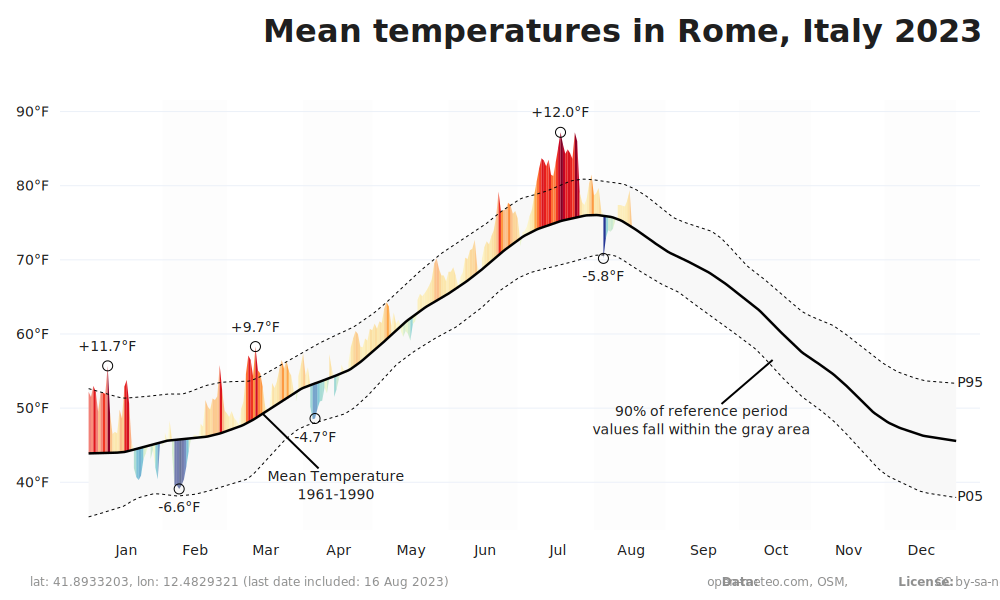

In [4]:
settings = {
    "system": "imperial",
    "highlight_max": 3,
    "highlight_min": 3,
    "save_file": False,
}
plot.update_settings(settings)
fig, file_path = plot.create_plot()

# Show the plot (using SVG to make it visible in GitHub)
fig.show("svg")

If we want to change year, reference period or metric, we have instanciate the class again:


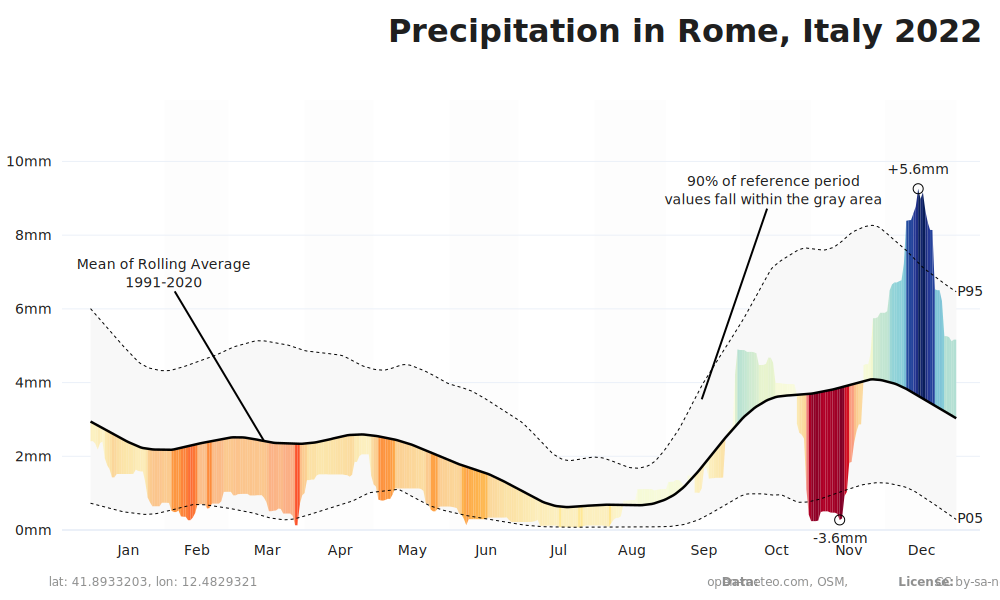

In [5]:
# Define metric, year and reference period
metric = "precipitation_rolling"
year = 2022
reference_period = (1991, 2020)

# Define other settings
settings = {"save_file": False}

# Instantiate the class and create the plot
plot = MeteoHistInteractive(coords, year, reference_period, metric, settings)
fig, file_path = plot.create_plot()

# Show the plot (using SVG to make it visible in GitHub)
fig.show("svg")

The same is true, if we want to change the location:

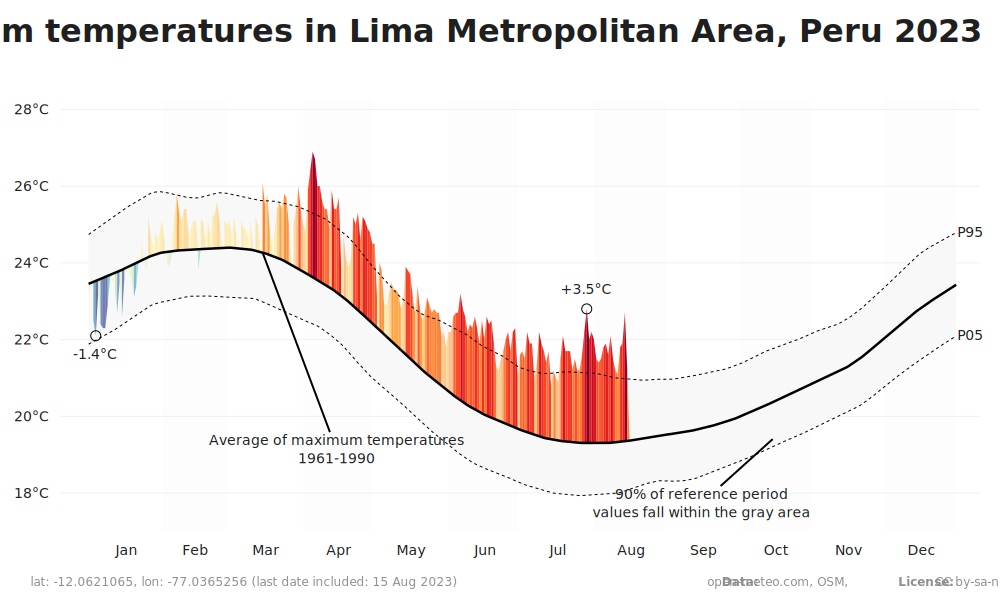

In [6]:
query = "Lima, Peru"

# Get coordinates and location name from query
result = MeteoHistInteractive.get_lat_lon(query)
coords = (result[0]["lat"], result[0]["lon"])
location_name = result[0]["location_name"]

# Define metric, year and reference period
metric = "temperature_max"
year = 2023
reference_period = (1961, 1990)

# Define other settings
settings = {"save_file": False}

# Instantiate the class and create the plot
plot = MeteoHistInteractive(coords, year, reference_period, metric, settings)
fig, file_path = plot.create_plot()

# Show the plot (using SVG to make it visible in GitHub)
fig.show("svg")

### Show data

We can also have a look at the data that is used to create the plot:

In [7]:
# Raw data as downloaded from the Open Meteo API
plot.data_raw

,date,value
0,1940-01-01,24.3
1,1940-01-02,24.8
2,1940-01-03,24.0
3,1940-01-04,25.0
4,1940-01-05,24.6
...,...,...
30546,2023-08-19,NaN
30547,2023-08-20,NaN
30548,2023-08-21,NaN
30549,2023-08-22,NaN


In [8]:
# Transformed data
plot.data

,dayofyear,min,p05,mean,p95,max,2023,2023_above,2023_below,2023_diff,2023_alpha,date
0,1,21.4,21.881257,23.453082,24.740421,25.9,23.2,NaN,23.2,-0.253082,0.6,2023-01-01
1,2,21.9,21.913569,23.478122,24.785578,26.2,23.7,23.7,NaN,0.221878,0.6,2023-01-02
2,3,21.9,21.946339,23.503333,24.830429,26.1,22.5,NaN,22.5,-1.003333,0.6,2023-01-03
3,4,21.4,21.979552,23.528707,24.875052,25.7,22.1,NaN,22.1,-1.428707,0.6,2023-01-04
4,5,22.0,22.013180,23.554215,24.919555,25.4,23.2,NaN,23.2,-0.354215,0.6,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,21.8,21.938375,23.272176,24.655738,26.7,NaN,NaN,NaN,NaN,0.6,2023-12-27
361,362,21.9,21.978396,23.311854,24.688752,26.5,NaN,NaN,NaN,NaN,0.6,2023-12-28
362,363,21.9,22.018096,23.351317,24.721674,26.6,NaN,NaN,NaN,NaN,0.6,2023-12-29
363,364,21.1,22.057367,23.390559,24.754532,26.4,NaN,NaN,NaN,NaN,0.6,2023-12-30
